# <center>Titanic - Machine Learning from Disaster</center>
===========================================================================================================================================
<p align="right">王鑫轶 大数据2001</p>
<p align="right">黄静淼 大数据2001</p>

# 一、数据概览


## 导入相关库

In [50]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 导入数据

训练集数据

In [51]:
path='titanic/'
test_data=pd.read_csv(path+'test.csv')
train_data=pd.read_csv(path+'train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|列名|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
|---|------------|--------|------|----|---|---|-----|-----|------|----|-----|--------|
|意义|乘客编号|乘客是否存活|顾客的舱位等级|姓名|性别|年龄|乘客的兄弟姐妹或配偶在船上的人数|乘客的父母儿子在船上的人数|乘客票的编号|票价|乘客舱位的编号|乘客上船的地点|

测试集数据

In [52]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


观察数据个数

In [53]:
print("the number of train set is: ", train_data.shape[0])
print("the number of test set is: ", test_data.shape[0])

the number of train set is:  891
the number of test set is:  418


我们可以看到训练集总共有891个，测试集有418个。

# 二、数据可视化与预处理

## 2.1 缺失值查看

In [54]:
train_data.info() # 查看信息
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


由上面可以看出 Age、Cabin、Embarked 列有的缺失值，且Cabin 列的缺失值过多，因此将 Cabin 列进行删除操做。

之后对 int 类型的 Age 列的缺失值以其平均值填充，对 object 类型的 Embarked 列的缺失值以其众数填充。

## 2.2.数据分类

按照原始的数据，我们可以将变特征变量分为以下五类：

分类变量：Sex, Embarked, pclass
 
连续变量：Age, Fare

离散变量：SibSp, Parch

其他变量：Name, PassengerId, Cabin,Ticket

我们对每一个特征变量进行存活率数据查看、绘制存活率图像、由图像得出结论、处理工作。

### 2.2.1 分类变量

 #### Sex

a.查看不同性别的存活率

In [55]:
train_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False) 


,Sex,Survived
0,female,0.742038
1,male,0.188908


b.作出性别与存活率的图像

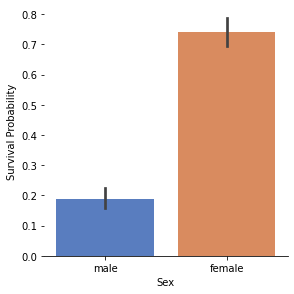

In [56]:
g = sns.factorplot(x="Sex", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")


c.结论：从图上可以明显看出，女性的存活率远高于男性

d.处理：离散化处理

In [57]:
def sexfun(s):
    if s=='male':
        return 1
    else:
        return 0

train_data.Sex = train_data.Sex.apply(sexfun)

#### Pclass

a.查看不同舱位等级的存活率

In [58]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


b.绘制不同舱位存活率的图像

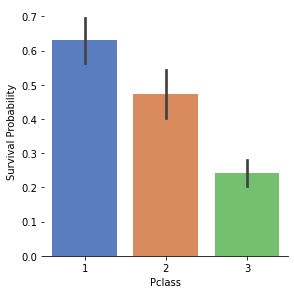

In [59]:
g = sns.factorplot(x="Pclass", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：舱位等级越高，存活率越高

#### Embarked

对Embarked进行平均值填充

In [60]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data.Embarked.mean) # 对 Embarked 列进行平均值填充

a.查看不同地点处登船的存活率

In [61]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,<bound method NDFrame._add_numeric_operations....,1.000000
1,C,0.553571
2,Q,0.389610
3,S,0.336957


b.绘制出不同地点登船的存活率图像

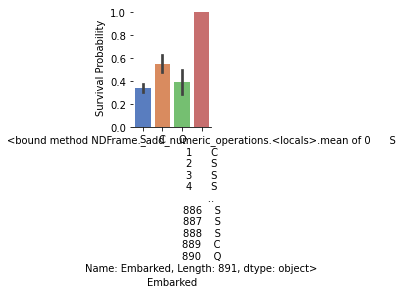

In [62]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：从C处登船存活率最高，S和Q两处存活率相差不大

In [63]:
def EmbarkedFun(s):# 上船地点转换函数
    if s=='S':
        return 0
    elif s=='C':
        return 1
    else:
        return 2

train_data.Embarked=train_data.Embarked.apply(EmbarkedFun) # 将 S 转换为 0，C 转换为 1，Q 转换为 2。

### 2.2.2 连续变量

#### Age

对Age先进行平均数填充

In [64]:
train_data['Age']=train_data['Age'].fillna(np.mean(train_data['Age'])) # 29.70 为 Age 列的均值。

a.查看不同年龄的存活率

In [65]:
train_data['Ageband'] = pd.cut(train_data['Age'], 5)
train_data[['Ageband', 'Survived']].groupby(['Ageband'], as_index=False).mean().sort_values(by='Ageband', ascending=True)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


b.绘制出不同年龄的存活率图像

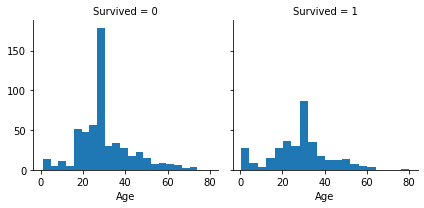

In [66]:
g=sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c.结论：小孩和老人的存活率较高

d.处理:归一化处理

In [67]:
min_max_scaler = preprocessing.MinMaxScaler()
train_data[['Fare','Age']]=min_max_scaler.fit_transform(train_data[['Fare','Age']]) # 对 Fare 和 Age 列进行归一化处理

####  Fare

a.查看不同票价的存活率情况

In [68]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 0.0154]",0.197309
1,"(0.0154, 0.0282]",0.303571
2,"(0.0282, 0.0605]",0.454955
3,"(0.0605, 1.0]",0.581081


b.绘制出不同票价的存活率图像

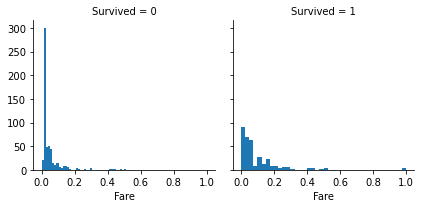

In [69]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Fare', bins=40)

c.结论：票价越高，存活率越高

d.处理：归一化处理

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
train_data[['Fare','Age']]=min_max_scaler.fit_transform(train_data[['Fare','Age']]) # 对 Fare 和 Age 列进行归一化处理
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ageband,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,NaN,0,"(16.336, 32.252]","(-0.001, 0.0154]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,1,"(32.252, 48.168]","(0.0605, 1.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,0,"(16.336, 32.252]","(0.0154, 0.0282]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,0,"(32.252, 48.168]","(0.0605, 1.0]"
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,NaN,0,"(32.252, 48.168]","(0.0154, 0.0282]"


### 2.2.3 离散变量

#### Sibsp

a.查看不同兄弟姐妹人数在船上的存活率

In [71]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


b.绘制不同兄弟姐妹在船上人数的存活率图像

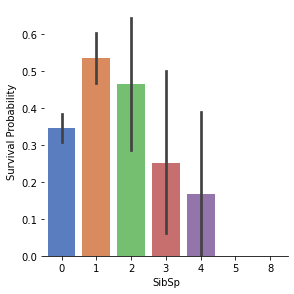

In [72]:
g = sns.factorplot(x="SibSp", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：船上兄弟姐妹或配偶人数越多，存活率越低

#### Parch

a.查看乘客父母孩子在船上的不同人数的存活率

In [73]:
train_data[["Parch", "Survived"]].groupby(['Parch'],\
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


b.绘制出乘客父母孩子在船上的人数的存活率图像

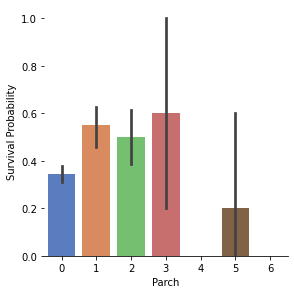

In [74]:
g = sns.factorplot(x="Parch", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：父母孩子个数为3人的存活率最高

同时我门认为这两列数据有较高的相关性，所以将他们合并。

In [75]:
train_data['Family'] = train_data.SibSp+train_data.Parch

### 2.2.4 其他变量

#### Name

我们认为乘客的姓名对是否存活无影响，所以将改列的数据删除。

In [76]:
train_data.drop(labels=['Name'],inplace=True,axis=1)

#### Passengered

 PassengerId 列对分析并没有实际意义，所以删除该列

In [77]:
train_data.drop(labels=['PassengerId'],inplace=True,axis=1)

#### Cabin

从上面缺失值查看中可以看出，Cabin 列的缺失值过多，因此将 Cabin 列进行删除操做。

In [78]:
train_data.drop(labels='Cabin',inplace=True,axis=1)

#### Ticket

Ticket 十分杂乱，我们选择剔除

In [79]:
train_data.drop(labels=['Ticket'],inplace=True,axis=1)

In [80]:
train_data.drop(labels=['SibSp','Parch','Ageband','FareBand'],inplace=True,axis=1)

删除多余的数据列

# 三、模型训练

### 1.交叉验证

此数据集的样本并不大，所以直接将数据集拆分为两个互斥的集合，其中一个作为训练集，一个作为测试集并不合适。它会损失一部分信息。

所以我们这里使用：**交叉验证(留一法交叉验证)**

它把每一个数据点都当成一个测试集，所以，数据集中有多少个样本，它就要迭代多少次。

如果数据集的数据量较大的话，是比较耗时的；但是，如果数据量很小的话，它的评分准确度是最高的。

In [81]:
cv=LeaveOneOut() # 创建 留一法交叉验证 对象

### 逻辑回归模型

逻辑回归与线性回归都是一种广义线性模型（generalized linear model，GLM）。

具体的说，都是从指数分布族导出的线性模型，线性回归假设Y|X服从高斯分布，逻辑回归假设Y|X服从伯努利分布。

In [82]:
logreg=LogisticRegression(max_iter=2000)
scores = cross_val_score(logreg,train_data.iloc[:,1:], train_data['Survived'],cv=cv) # 使用交叉训练 训练逻辑回归模型
print("平均分:{:.4f}".format(scores.mean()))

平均分:0.7969


**调参**

我们考察LogisticRegression()的参数C对分类模型的预测性能的影响。C是正则化项系数的倒数，它越小则正则化项的权重越大。


In [83]:
Cs=np.logspace(-2,4,num=10)
scores=[]
for C in Cs:
    regr=LogisticRegression(C=C)
    scores.append(cross_val_score(regr,train_data.iloc[:,1:], train_data['Survived'],cv=cv).mean())


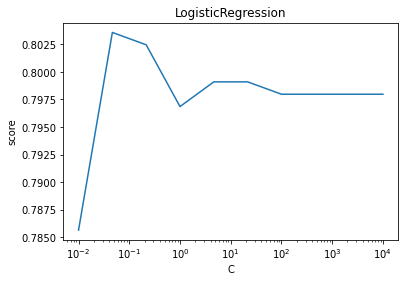

In [84]:
# 画出准确率关于C的变化趋势图
fig=plt.figure
plt.xlabel(r'C')
plt.ylabel(r'score')
plt.xscale('log')
plt.title('LogisticRegression')
plt.plot(Cs,scores)
plt.show()

### K-近邻算法

knn算法的**基本法则**是：相同类别的样本之间在特征空间中应当聚集在一起。 

In [85]:
knn=KNeighborsClassifier()
scores = cross_val_score(knn,train_data.iloc[:,1:], train_data['Survived'],cv=cv) # 使用交叉训练 knn模型
print("平均分:{:.4f}".format(scores.mean()))

平均分:0.7980


**调参**

KNN算法我们主要要考虑三个重要的要素，对于固定的训练集，只要这三点确定了，算法的预测方式也就决定了。

这三个最终的要素是**k值的选取**，**距离度量的方式**和**分类决策规则**。

对于分类决策规则，一般都是使用前面提到的多数表决法。

所以我们重点是关注与**k值的选择**和**距离的度量方式**。

当 p=1 时，表示距离的计算方式是 *曼哈顿距离* 

当 p=2 时，表示的是 *欧几里得距离* 

In [86]:
Ps=[1,2]# 表示不同的距离计算方法
k_scores = {}# 将不同德参数的分数以字典储存
k_range = range(1,31)
for p in Ps:
    for k in k_range:
        knn = KNeighborsClassifier(n_jobs=2, n_neighbors=k,p=p)
        sco = cross_val_score(knn, train_data.iloc[:,1:], train_data['Survived'],cv=cv,scoring='accuracy')
        k_scores[sco.mean()]=[p,k]
f=k_scores[max(k_scores.keys())]
str='当： p={} n_neighbors={} 时\n平均准确率最高，为{}'.format(f[0],f[1],max(k_scores.keys()))
print(str)

当： p=1 n_neighbors=22 时
平均准确率最高，为0.813692480359147


所以最后我们打算用KNN模型来进行预测

## 模型预测

### 预测数据的预处理

In [87]:
test_data['Family'] = test_data.SibSp+test_data.Parch
test_data.drop(labels=['Name','Ticket','PassengerId','SibSp','Parch','Cabin'],inplace=True,axis=1)
# 删除 'Name','Ticket','PassengerId','SibSp','Parch','Cabin' 列
test_data['Age']=test_data['Age'].fillna(np.mean(test_data['Age']))
test_data['Embarked']=test_data['Embarked'].fillna(test_data.Embarked.mean) # 对 Age 和 Embarked 列进行平均值填充
test_data.Sex = test_data.Sex.apply(sexfun) # 男性为 1，女性为 0。
test_data.Embarked=test_data.Embarked.apply(EmbarkedFun) # 将 S 转换为 0，C 转换为 1，Q 转换为 2。
test_data['Fare']=test_data['Fare'].fillna(np.mean(test_data['Fare']))

### 模型训练和预测

In [88]:
knn=KNeighborsClassifier(p=1,n_neighbors=22)
knn.fit(train_data.iloc[:,1:],train_data['Survived'])
test_data['Survived']=knn.predict(test_data)


#### 输出 csv 文件

In [89]:
ans=pd.DataFrame({'PassengerId':range(892,1310),'Survived':test_data['Survived'].values})
ans.to_csv("predicted2.csv",index=False)

# 结果

![图片](ans.png "答案")

# 参考资料
> [（十）K近邻法（KNN）](https://codetd.com/article/2770881)
> 
> [Python机器学习之交叉验证](https://www.jianshu.com/p/e738226c54f0)